### CONDA ENVIRONMENTS

For steps __1. preprocess__ and __2. mip__, `conda activate g5ht-pipeline`

For step __3. segment__, `conda activate segment-torch` or `conda activate torchcu129`

For step __4. spline, 5. orient, 6. warp, 7. reg__

In [ ]:
import sys
import os

import utils

import importlib

from preprocess import main as preprocess_nd2
from mip import main as mip

_ = importlib.reload(sys.modules['mip'])
_ = importlib.reload(sys.modules['utils'])

# SPECIFY DATA TO PROCESS

In [ ]:

# DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028'
# INPUT_ND2 = 'date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001.nd2'
DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002'
INPUT_ND2 = '022025_eft_41z_starved_worm002.nd2'
INPUT_ND2_PTH = os.path.join(DATA_PTH, INPUT_ND2)
NOISE_PTH = r'C:\Users\munib\POSTDOC\CODE\g5ht-pipeline\noise_042925.tif'

OUT_DIR = os.path.splitext(INPUT_ND2_PTH)[0]

STACK_LENGTH = 41

noise_stack = utils.get_noise_stack(NOISE_PTH, STACK_LENGTH)
stack_range = utils.get_range_from_nd2(INPUT_ND2_PTH) # aka frame indices

# 1. PREPROCESS

In [ ]:
from preprocess import main as preprocess_nd2
_ = importlib.reload(sys.modules['utils'])

# command-line arguments
sys.argv = ["", INPUT_ND2_PTH, "0", NOISE_PTH]

# Call the main function
preprocess_nd2()

### TEST PARALLEL

In [4]:
from preprocess_parallel import main as preprocess_nd2_parallel
_ = importlib.reload(sys.modules['preprocess_parallel'])

# command-line arguments
sys.argv = ["", INPUT_ND2_PTH, "0", "1199", NOISE_PTH]

# Call the main function
preprocess_nd2_parallel()

Processing 1200 stacks (0-1199) using 20 workers...


100%|██████████| 1200/1200 [01:53<00:00, 10.59it/s]


Parallel preprocessing complete.


# 2. MAX INTENSITY PROJECTION

In [5]:
from mip import main as mip

_ = importlib.reload(sys.modules['mip'])
_ = importlib.reload(sys.modules['utils'])

# command-line arguments
sys.argv = ["", INPUT_ND2_PTH]

# Call the main function
mip()

<tifffile.TiffWriter 'mip.tif'> writing nonconformant BigTIFF ImageJ


0000.tif written to mip.tif
0001.tif written to mip.tif
0002.tif written to mip.tif
0003.tif written to mip.tif
0004.tif written to mip.tif
0005.tif written to mip.tif
0006.tif written to mip.tif
0007.tif written to mip.tif
0008.tif written to mip.tif
0009.tif written to mip.tif
0010.tif written to mip.tif
0011.tif written to mip.tif
0012.tif written to mip.tif
0013.tif written to mip.tif
0014.tif written to mip.tif
0015.tif written to mip.tif
0016.tif written to mip.tif
0017.tif written to mip.tif
0018.tif written to mip.tif
0019.tif written to mip.tif
0020.tif written to mip.tif
0021.tif written to mip.tif
0022.tif written to mip.tif
0023.tif written to mip.tif
0024.tif written to mip.tif
0025.tif written to mip.tif
0026.tif written to mip.tif
0027.tif written to mip.tif
0028.tif written to mip.tif
0029.tif written to mip.tif
0030.tif written to mip.tif
0031.tif written to mip.tif
0032.tif written to mip.tif
0033.tif written to mip.tif
0034.tif written to mip.tif
0035.tif written to 

# 3. SEGMENT

### on home pc
`conda activate segment-torch`

Uses a separate conda environment from the rest of the pipeline. create it using:
`conda env create -f segment_torch.yml`

### on lab pc
`conda activate torchcu129`

Uses a separate conda environment from the rest of the pipeline. create it following steps in:
`segment_torch_cu129_environment.yml`

### setup each time model weights change
Need to set path to model weights as `CHECKPOINT` in `eval_torch.py`

In [ ]:
import sys
import os
from segment.segment_torch import main as segment_mip


# DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028'
# INPUT_ND2 = 'date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001.nd2'
DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002'
INPUT_ND2 = '022025_eft_41z_starved_worm002.nd2'
INPUT_ND2_PTH = os.path.join(DATA_PTH, INPUT_ND2)
OUT_DIR = os.path.splitext(INPUT_ND2_PTH)[0]
MIP_PTH = os.path.join(OUT_DIR, 'mip.tif')

# command-line arguments
sys.argv = ["", MIP_PTH]

segment_mip()


mip: 0
mip: 4
mip: 8
mip: 12
mip: 16
mip: 20
mip: 24
mip: 28
mip: 32
mip: 36
mip: 40
mip: 44
mip: 48
mip: 52
mip: 56
mip: 60
mip: 64
mip: 68
mip: 72
mip: 76
mip: 80
mip: 84
mip: 88
mip: 92
mip: 96
mip: 100
mip: 104
mip: 108
mip: 112
mip: 116
mip: 120
mip: 124
mip: 128
mip: 132
mip: 136
mip: 140
mip: 144
mip: 148
mip: 152
mip: 156
mip: 160
mip: 164
mip: 168
mip: 172
mip: 176
mip: 180
mip: 184
mip: 188
mip: 192
mip: 196
mip: 200
mip: 204
mip: 208
mip: 212
mip: 216
mip: 220
mip: 224
mip: 228
mip: 232
mip: 236
mip: 240
mip: 244
mip: 248
mip: 252
mip: 256
mip: 260
mip: 264
mip: 268
mip: 272
mip: 276
mip: 280
mip: 284
mip: 288
mip: 292
mip: 296
mip: 300
mip: 304
mip: 308
mip: 312
mip: 316
mip: 320
mip: 324
mip: 328
mip: 332
mip: 336


# 4. SPLINE

`conda activate g5ht-pipeline`

In [2]:
import sys
import os
from spline import main as get_spline

# PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\label.tif'
PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002\022025_eft_41z_starved_worm002\label.tif'

# command-line arguments
sys.argv = ["", PTH]

get_spline()

100%|██████████| 1200/1200 [00:51<00:00, 23.26it/s]


# 5. ORIENT

`conda activate g5ht-pipeline`

100%|██████████| 1200/1200 [00:01<00:00, 601.75it/s]


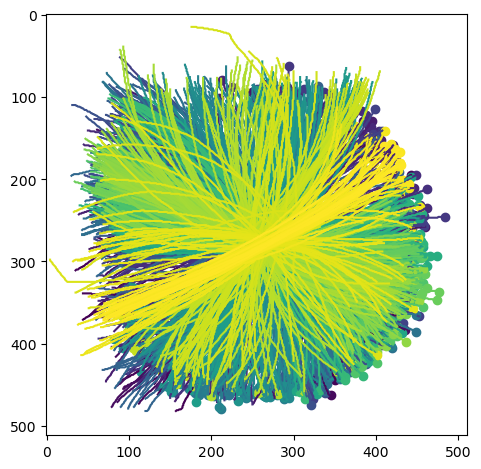

Rendering and collecting frames...


100%|██████████| 1200/1200 [00:59<00:00, 20.14it/s]


Saving TIFF stack to: C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002\022025_eft_41z_starved_worm002\oriented_stack.tif
TIFF stack saved successfully.


<Figure size 640x480 with 0 Axes>

In [3]:
import sys
import os
from orient import main as find_orientation

# PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\spline.json'
PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002\022025_eft_41z_starved_worm002\spline.json'

# command-line arguments
sys.argv = ["", PTH, 100, 400]

find_orientation()

# 6. WARP

`conda activate g5ht-pipeline`

TODO: parallelize

In [ ]:
import sys
import os
from warp import main as warp_worm
from tqdm import tqdm

PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001'
# PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002\022025_eft_41z_starved_worm002'

for i in tqdm(range(1200)):
    # command-line arguments
    sys.argv = ["", PTH, i]

    warp_worm()

  2%|▏         | 23/1200 [01:47<1:31:18,  4.66s/it]

### TEST PARALLEL (TODO)

In [ ]:
from warp_parallel import main as warp_worm_parallel

PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001'

# command-line arguments
sys.argv = ["", PTH, "0", "1199"]

# Call the main function
warp_worm_parallel()

# 7. REG

`conda activate g5ht-pipeline`

TODO: parallelize

- changed `moving_mask` to be `fixed_mask.tif`. is that right?

In [ ]:
import sys
import os
from reg import main as reg_worm
from tqdm import tqdm

PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001'

for i in tqdm(range(1200)):
    # command-line arguments
    sys.argv = ["", PTH, i]

    reg_worm()